<a href="https://colab.research.google.com/github/BowinJH/MLWeek-D1/blob/master/Copy_of_Workshop_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

You might want to input parameters to the sb.set() to change the style of the graph that will be plotted.




In [0]:
sb.set?

The **context** parameter affects things like the size of the labels, lines, and other elements of the plot, but not the overall style.
Options(size compared to normal):


*   paper (0.8x)
*   talk (1.3x)
*   poster (1.6x)

The **style** parameter affects the background of the graph that will be plotted. The options are:


*   darkgrid (blue background with grids)
*   dark (blue background without grids)
*   whitegrid (white background with grids)
*   white (white background without grids)

The **palette** parameter affects the color of the line and bar that will be plotted. The options are:


*   deep
*   muted
*   bright
*   pastel
*   dark
*   colorblind

Run the code below to set the style and see the colors in the palette set






















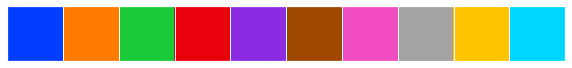

In [0]:
sb.set(palette="bright")
sb.palplot(sb.color_palette())

Load the data into a 'Dataframe'.

In [0]:
df = pd.read_csv('/content/drive/My Drive/MLDA Deep Learning Week 2019 2020 Sem 2/telecom_churn.csv')

To get acquainted with our data, let’s look at the first 5 entries using `head()`:

In [0]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Here is the description of our features:

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **State** | State abbreviation (like KS = Kansas) | String | Categorical |
| **Account length** | How long the client has been with the company | Numerical | Quantitative |
| **Area code** | Phone number prefix | Numerical | Categorical |
| **International plan** | International plan (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Voice mail plan** | Voicemail (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Number vmail messages** | Number of voicemail messages | Numerical | Quantitative |
| **Total day minutes** |  Total duration of daytime calls | Numerical | Quantitative |
| **Total day calls** | Total number of daytime calls  | Numerical | Quantitative |
| **Total day charge** | Total charge for daytime services | Numerical | Quantitative |
| **Total eve minutes** | Total duration of evening calls | Numerical | Quantitative |
| **Total eve calls** | Total number of evening calls | Numerical | Quantitative |
| **Total eve charge** | Total charge for evening services | Numerical | Quantitative |
| **Total night minutes** | Total duration of nighttime calls | Numerical | Quantitative |
| **Total night calls** | Total number of nighttime calls | Numerical | Quantitative |
| **Total night charge** | Total charge for nighttime services | Numerical | Quantitative |
| **Total intl minutes** | Total duration of international calls  | Numerical | Quantitative |
| **Total intl calls** | Total number of international calls | Numerical | Quantitative |
| **Total intl charge** | Total charge for international calls | Numerical | Quantitative |
| **Customer service calls** | Number of calls to customer service | Numerical | Categorical/Ordinal |

The last data column, Churn, is our target variable. It is binary: True indicates that that the company eventually lost this customer, and False indicates that the customer was retained. Later, we will build models that predict this feature based on the remaining features. This is why we call it a target.



In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


## **2. Univariate visualization**

*Univariate* analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the *distribution of its values* and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

#### **2.1 Quantitative features**

*Quantitative features* take on ordered numerical values. Those values can be *discrete*, like integers, or *continuous*, like real numbers, and usually express a count or a measurement.

##### Histograms and density plots

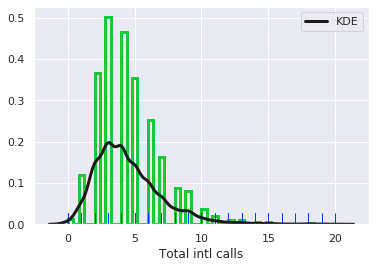

In [0]:
plot = sb.distplot(df["Total intl calls"],rug=True,kde_kws={"color": "k", "lw": 3, "label": "KDE"}, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "g"})

The most commonly used parameters in the distplot is the rug, kde, hist which are used to display the rug, kernel density plot and histogram.

The code below is used to save any seaborn plot to a file.

In [0]:
figure = plot.get_figure()
figure.savefig('output.png')

Or you can loop through the columns to plot the distplot for all the numerical variables

In [0]:
numeric_df= df.select_dtypes(include=["int64","float64"])

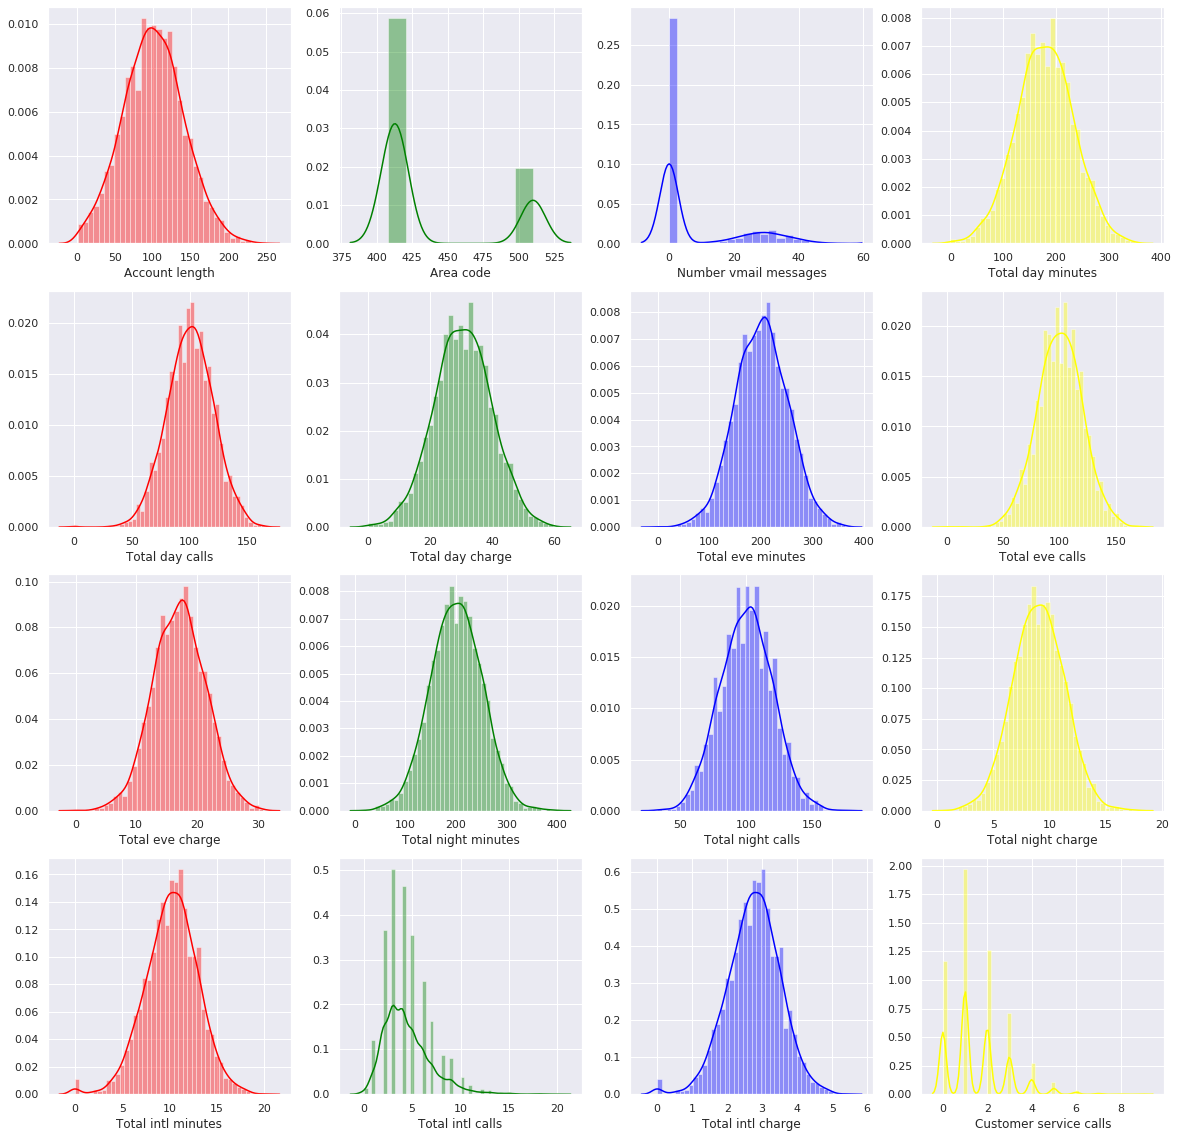

In [0]:
f,axes = plt.subplots(4,4,figsize=(20,20))
for index,column in enumerate(numeric_df.columns):
  color = ["red","green","blue","yellow"]
  sb.distplot(numeric_df[column],ax=axes[math.floor(index/4),index%4],color=color[index%4])

The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin.

## Box plot

Another useful type of visualization is a *box plot*. `seaborn` does a great job here:

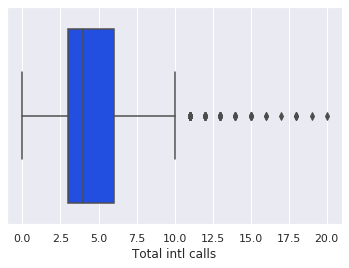

In [0]:
sb.boxplot(x='Total intl calls', data=df);

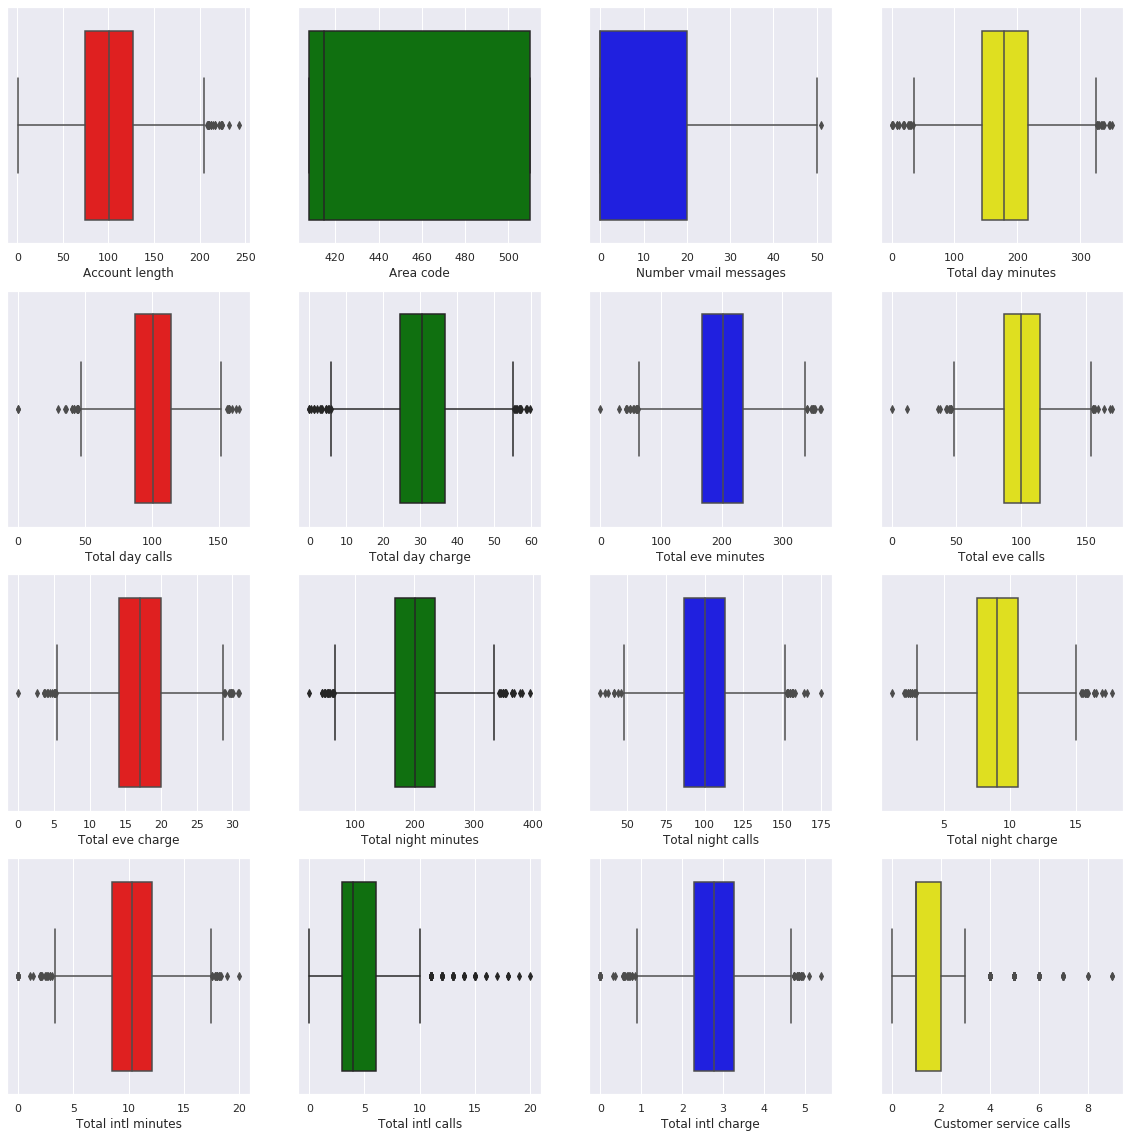

In [0]:
f,axes = plt.subplots(4,4,figsize=(20,20))
for index,column in enumerate(numeric_df.columns):
  color = ["red","green","blue","yellow"]
  sb.boxplot(numeric_df[column],ax=axes[math.floor(index/4),index%4],color=color[index%4])

Let's see how to interpret a box plot. Its components are a *box* (obviously, this is why it is called a *box plot*), the so-called *whiskers*, and a number of individual points (*outliers*).

The box by itself illustrates the interquartile spread of the distribution; its length is determined by the $25th \, (\text{Q1})$ and $75th \, (\text{Q3})$ percentiles. The vertical line inside the box marks the median ($50\%$) of the distribution. 

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval $(\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR})$, where $\text{IQR} = \text{Q3} - \text{Q1}$ is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range).

Outliers that fall outside of the range bounded by the whiskers are plotted individually as black points along the central axis.

We can see that a large number of international calls is quite rare in our data.

#### Violin plot

The last type of distribution plots that we will consider is a *violin plot*.

Look at the figures below. On the left, we see the already familiar box plot. To the right, there is a *violin plot* with the kernel density estimate on both sides.

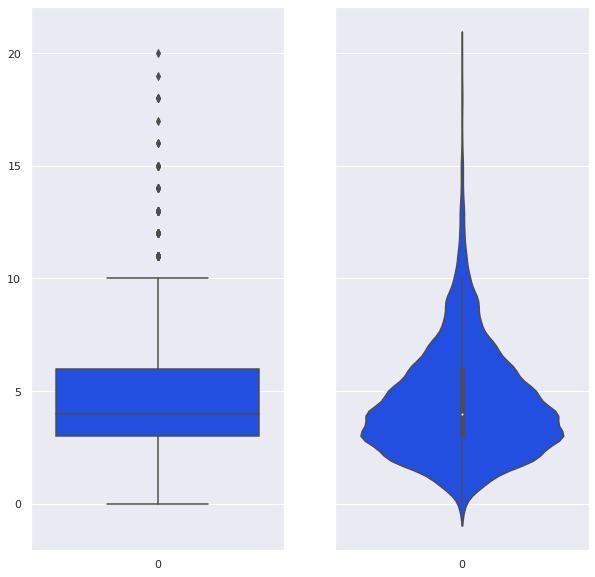

In [0]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
sb.boxplot(data=df['Total intl calls'], ax=axes[0]);
sb.violinplot(data=df['Total intl calls'], ax=axes[1]);

![alt text](https://miro.medium.com/max/780/1*TTMOaNG1o4PgQd-e8LurMg.png)

##### Bar plot

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the `seaborn`'s function [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html). There is another function in `seaborn` that is somewhat confusingly called [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

Let's plot the distributions for two categorical variables:

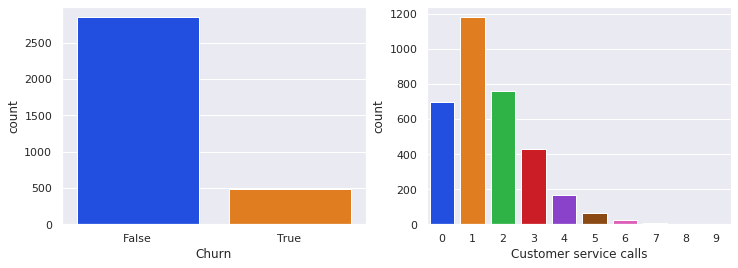

In [0]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sb.countplot(x='Churn', data=df, ax=axes[0]);
sb.countplot(x='Customer service calls', data=df, ax=axes[1]);

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:
1. *Histograms* are best suited for looking at the distribution of numerical variables while *bar plots* are used for categorical features.
2. The values on the X-axis in the *histogram* are numerical; a *bar plot* can have any type of values on the X-axis: numbers, strings, booleans.
3. The *histogram*'s X-axis is a *Cartesian coordinate axis* along which values cannot be changed; the ordering of the *bars* is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider *ordinal* variables (like *Customer service calls* in our data), the bars are usually ordered by variable value.

The left chart above vividly illustrates the imbalance in our target variable. The bar plot for *Customer service calls* on the right gives a hint that the majority of customers resolve their problems in maximum 2–3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now, so let's move on to some more interesting and powerful visual techniques.

Countplot has a **hue** parameter to divide the rows for each category in **x** parameter according to the categories in another column.

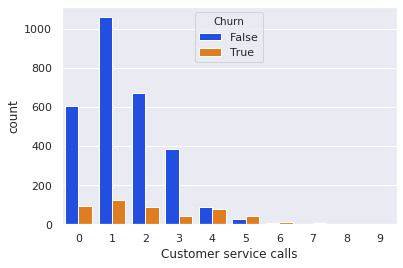

In [0]:
sb.countplot(x='Customer service calls',hue='Churn',data=df)

#**3. Multivariate visualization**

*Multivariate* plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

#### **3.1 Quantitative vs. Quantitative**

#####**Correlation matrix**

Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method [`corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) on a `DataFrame` that calculates the correlation between each pair of features. Then, we pass the resulting *correlation matrix* to [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) from `seaborn`, which renders a color-coded matrix for the provided values:

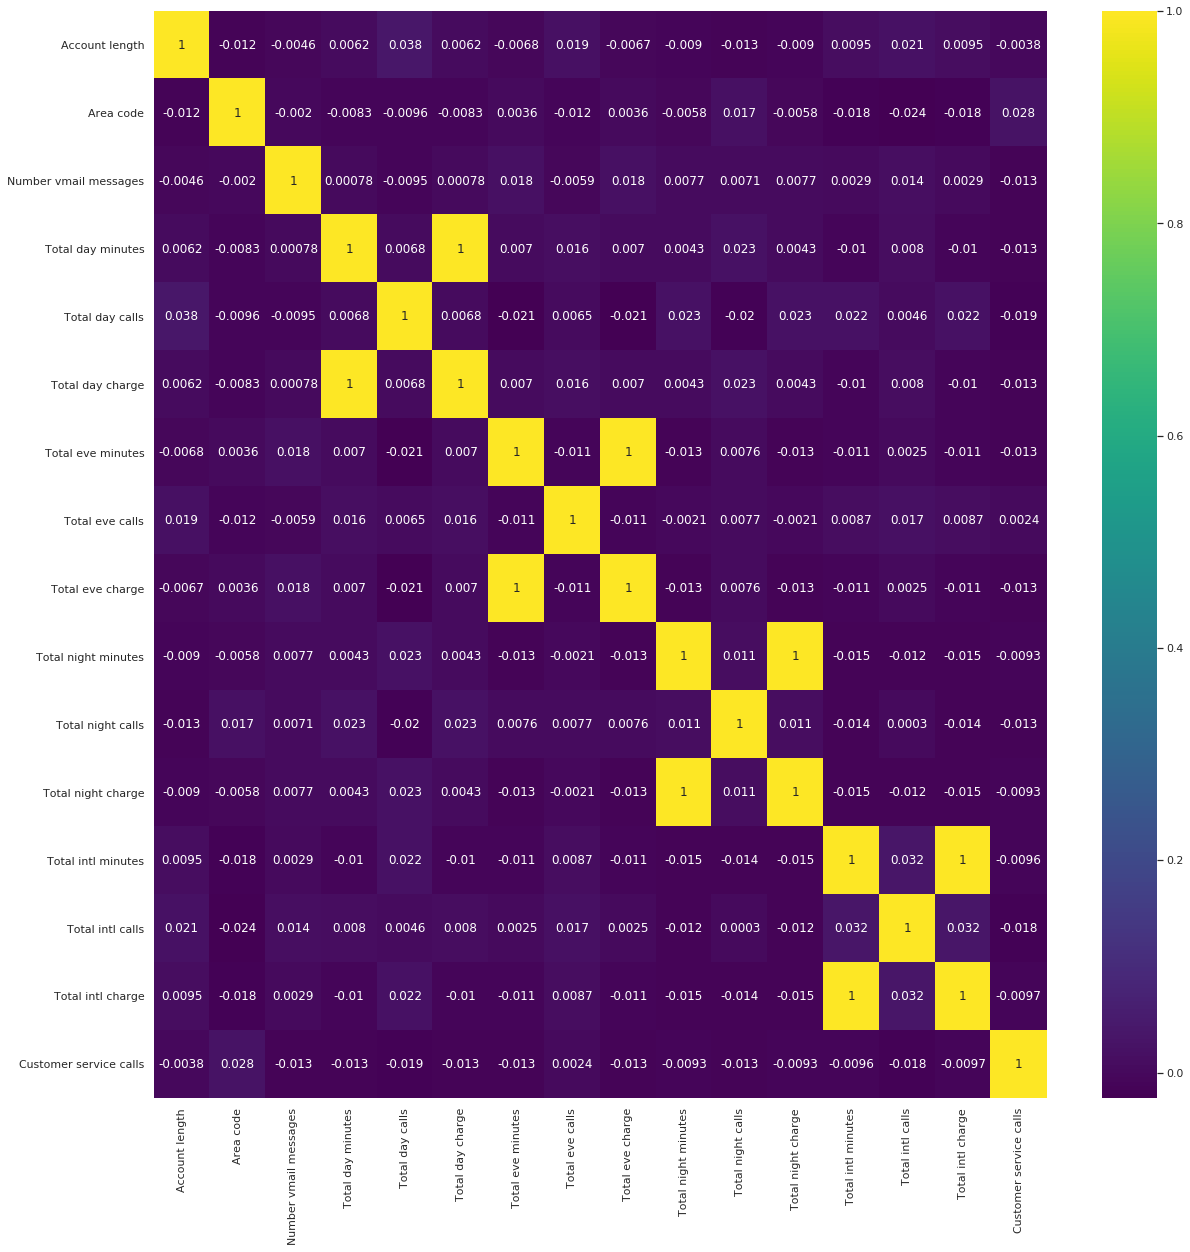

In [0]:
fig,axes = plt.subplots(figsize=(20,20))
sb.heatmap(numeric_df.corr(),cmap="viridis",annot=True,fmt='.2g')

The **fmt** parameter determines the precision of the annotation value displayed in the heatmap. The format is similar to the one in C. Examples:



*   '.2g' means 2 significant figures
*   '.2f' means 2 decimal places



From the colored correlation matrix generated above, we can see that there are 4 variables such as *Total day charge* that have been calculated directly from the number of minutes spent on phone calls (*Total day minutes*). These are called *dependent* variables and can therefore be left out since they do not contribute any additional information. Let's get rid of them:

In [0]:
df = df.drop(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'],axis=1)
numeric_df = numeric_df.drop(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'],axis=1)

Heatmap can also be used to display a pivot table

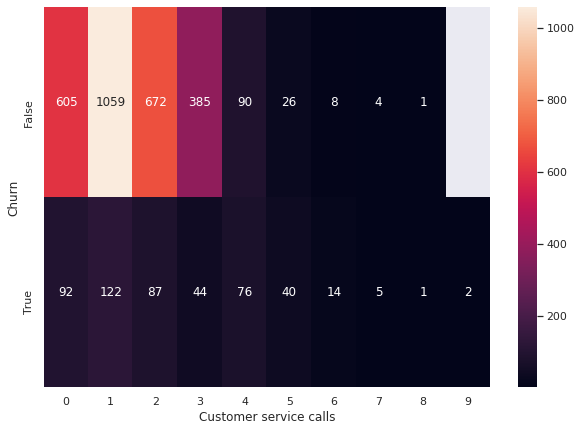

In [0]:
pivot = df.pivot_table(index='Churn',columns='Customer service calls',values='International plan',aggfunc=np.count_nonzero)
fig,axes = plt.subplots(figsize=(10,7))
sb.heatmap(pivot,annot=True,fmt='.0f')

##### **Scatter plot**

The **scatter plot** displays values of two numerical variables as **Cartesian coordinates** in 2D space. Scatter plots in 3D are also possible.

Let's try out the function scatterplot() from seaborn

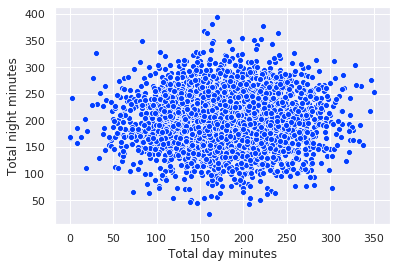

In [0]:
sb.scatterplot(df['Total day minutes'], df['Total night minutes']);

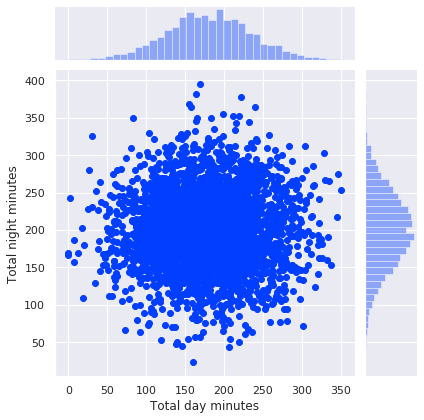

In [0]:
sb.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='scatter');

The function [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) plots two histograms that may be useful in some cases.

Using the same function, we can also get a smoothed version of our bivariate distribution to show the density:

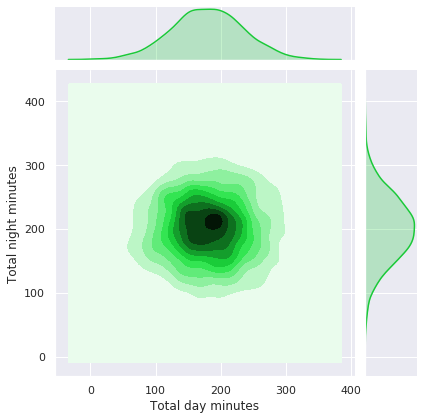

In [0]:
sb.jointplot('Total day minutes', 'Total night minutes', data=df,
              kind="kde", color="g");

This is basically a bivariate version of the *Kernel Density Plot* discussed earlier.

##### **Scatterplot matrix**

In some cases, we may want to plot a *scatterplot matrix* such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

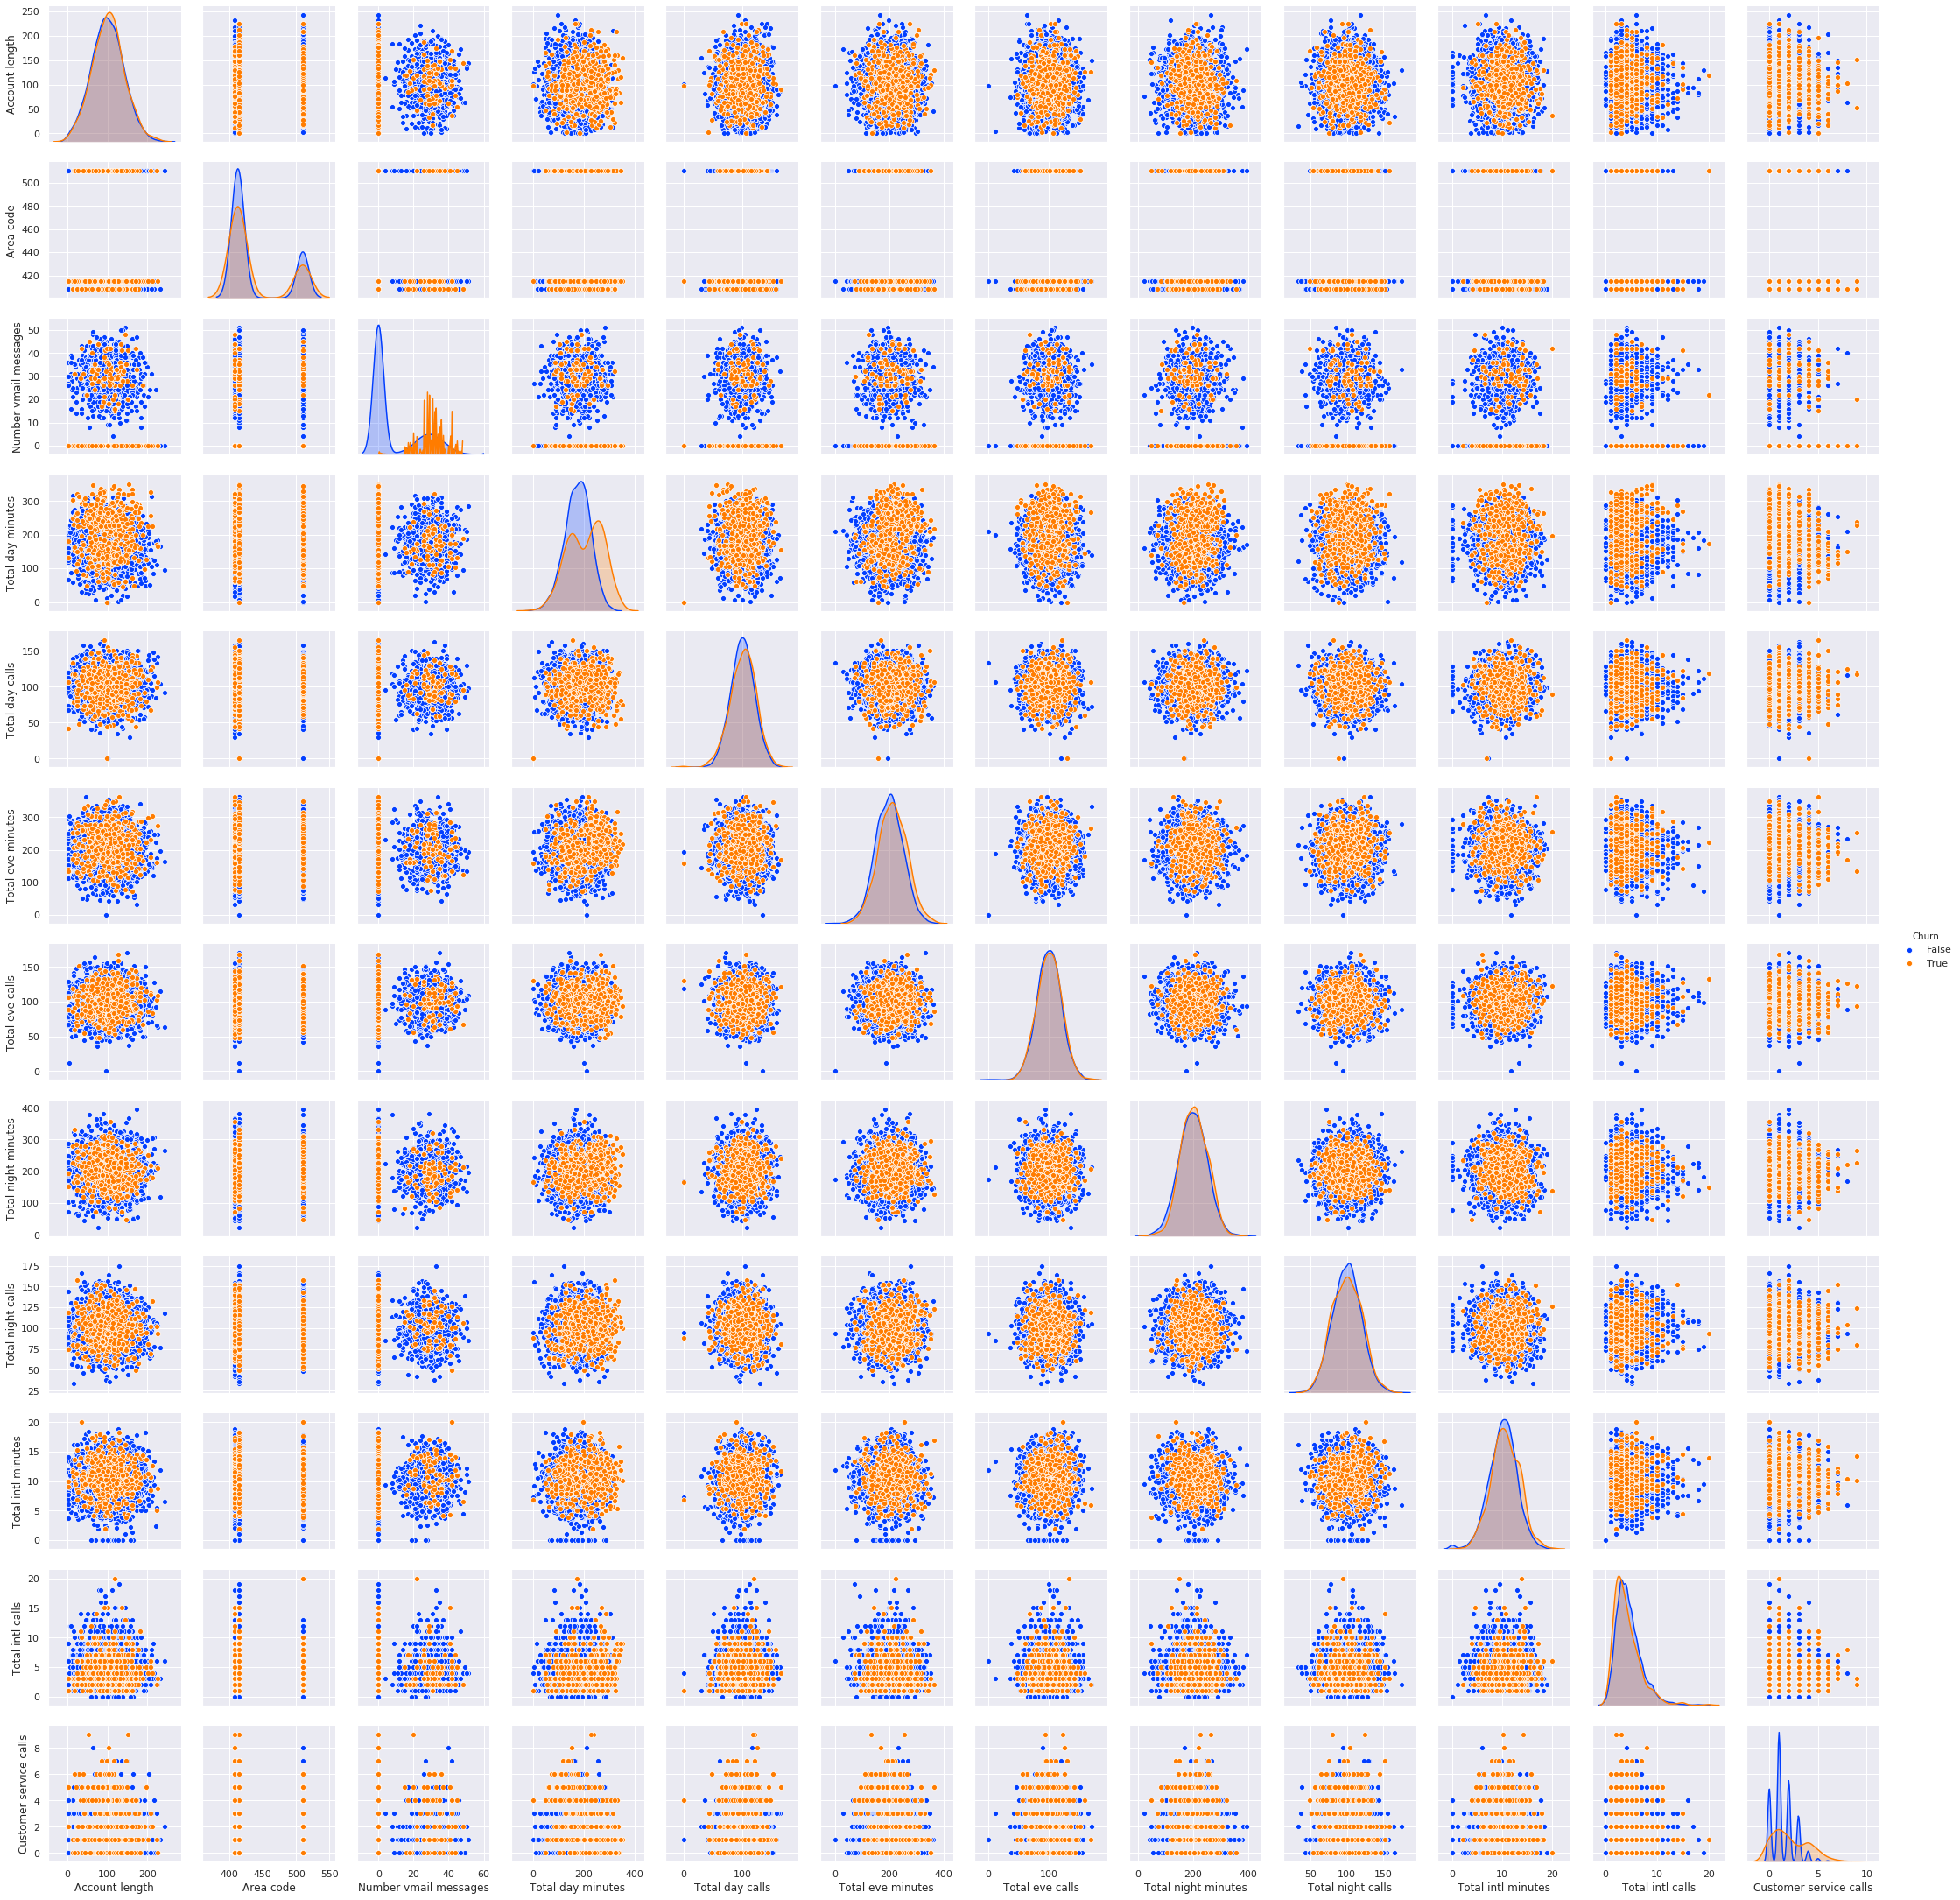

In [0]:
sb.pairplot(df,hue='Churn')

Sometimes, such a visualization may help draw conclusions about data; but, in this case, everything is pretty clear with no surprises.

#### **3.2 Quantitative vs. Categorical**

In this section, we will make our simple quantitative plots a little more exciting. We will try to gain new insights for churn prediction from the interactions between the numerical and categorical features.

More specifically, let's see how the input variables are related to the target variable Churn.

Previously, you learned about scatter plots. Additionally, their points can be color or size coded so that the values of a third categorical variable are also presented in the same figure. We can achieve this with the `scatter()` function seen above, but, let's try a new function called [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) and use the parameter `hue` to indicate our categorical feature of interest:

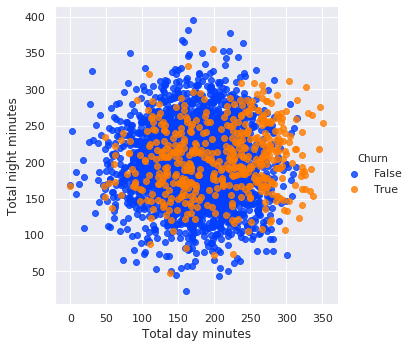

In [0]:
sb.lmplot('Total day minutes', 'Total night minutes', data=df, hue='Churn', fit_reg=False);

It seems that our small proportion of disloyal customers lean towards the top-right corner; that is, such customers tend to spend more time on the phone during both day and night. But this is not absolutely clear, and we won't make any definitive conclusions from this chart.

Now, let’s create box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (`Churn=False`) and those who left (`Churn=True`).

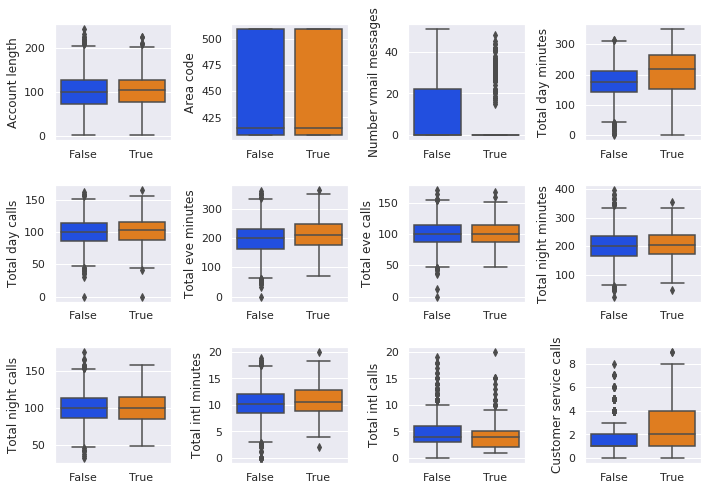

In [0]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numeric_df):
    ax = axes[int(idx / 4), idx % 4]
    sb.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

From this chart, we can see that the greatest discrepancy in distribution between the two groups is for three variables: *Total day minutes*, *Customer service calls*, and *Number vmail messages*.

Let's look at the distribution of day minutes spoken for the loyal and disloyal customers separately. We will create box and violin plots for *Total day minutes* grouped by the target variable.

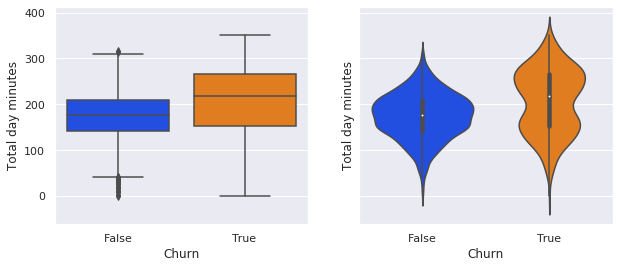

In [0]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sb.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sb.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

In this case, the violin plot does not contribute any additional information about our data as everything is clear from the box plot alone: disloyal customers tend to talk on the phone more.

**An interesting observation**: on average, customers that discontinue their contracts are more active users of communication services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates. The company will need to undertake additional economic analysis to find out whether such measures would be beneficial.

When we want to analyze a quantitative variable in two categorical dimensions at once, there is a suitable function for this in the `seaborn` library called [`catplot()`](https://seaborn.pydata.org/generated/seaborn.factorplot.html). For example, let's visualize the interaction between *Total day minutes* and two categorical variables in the same plot:

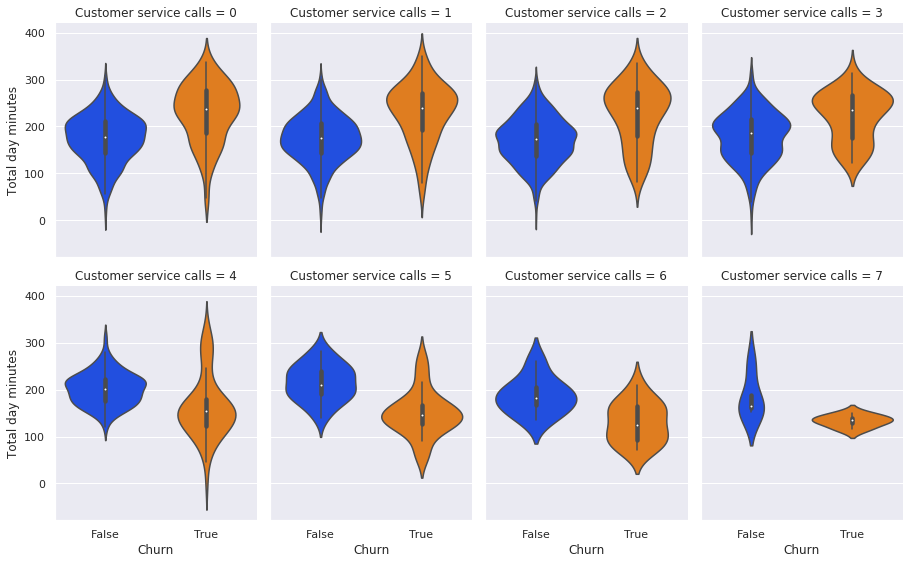

In [0]:
sb.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
               data=df[df['Customer service calls'] < 8], kind="violin",
               col_wrap=4, height=4, aspect=.8);

From this, we could conclude that, starting with 4 calls, *Total day minutes* may no longer be the main factor for customer churn. Perhaps, in addition to our previous guess about the tariffs, there are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.

#### **3.3 Categorical vs. Categorical**

As we saw earlier in this article, the variable *Customer service calls* has few unique values and, thus, can be considered either numerical or ordinal. We have already seen its distribution with a *count plot*. Now, we are interested in the relationship between this ordinal feature and the target variable *Churn*.

Let's look at the distribution of the number of calls to customer service, again using a *count plot*. This time, let's also pass the parameter `hue=Churn` that adds a categorical dimension to the plot:

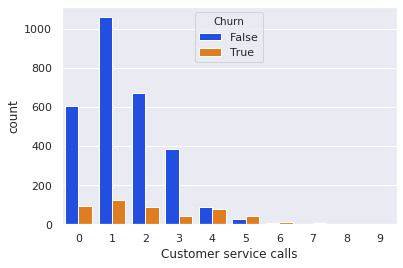

In [0]:
sb.countplot(x='Customer service calls', hue='Churn', data=df);

**An observation**: the churn rate increases significantly after 4 or more calls to customer service.

Now, let's look at the relationship between *Churn* and the binary features, *International plan* and *Voice mail plan*.

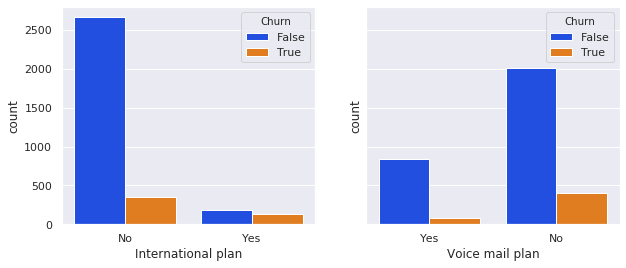

In [0]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sb.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sb.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

**An observation**: when *International Plan* is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature. We do not observe the same effect with *Voice mail plan*.

# **Practice**









Read data

In [0]:
train_df = pd.read_csv("/content/drive/My Drive/MLDA Deep Learning Week 2019 2020 Sem 2/titanic_train.csv", index_col='PassengerId')

In [0]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [0]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Moran, Mr. Daniel J",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Let's drop`Cabin`, and then – all rows with missing values.

In [0]:
train_df = train_df.drop('Cabin', axis=1).dropna()

In [0]:
train_df.shape

(712, 10)

**1. Build a picture to visualize all scatter plots for each pair of features `Age`, `Fare`, `SibSp`, `Parch` and `Survived`. (`pairplot` from Seaborn)**

In [0]:
# You code here

**2. How does ticket price (`Fare`) depend on `Pclass`? Build a boxplot.**

In [0]:
# You code here

**3. How is the percentage of surviving passengers dependent on passengers' gender? Depict it with `Seaborn.countplot` using the `hue` argument.**

In [0]:
# You code here

**4. How does the distribution of ticket prices differ for those who survived and those who didn't. Depict it with `Seaborn.boxplot`**

In [0]:
# You code here

**5. How does survival depend on passengers' age?  Verify (graphically) an assumption that youngsters (< 30 y.o.) survived more frequently than old people (> 55 y.o.).**

In [0]:
# You code here

**6. Create a pivot table with age as its row index and Pclass as its column to see the number of people who survived across age and Pclass**